#Omar Abou Chaer
991555600

Final Project

Predicting Red Wine Quality Using PyCaret

In [6]:
!pip install pycaret

In [7]:

import pandas as pd
import numpy as np

# Loading the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Dataset Description

This dataset contains physicochemical properties of red Portuguese "Vinho Verde" wine, along with a sensory quality scoreassessed by wine experts.

**Input features (X):**  
- `fixed acidity`  
- `volatile acidity`  
- `citric acid`  
- `residual sugar`  
- `chlorides`  
- `free sulfur dioxide`  
- `total sulfur dioxide`  
- `density`  
- `pH`  
- `sulphates`  
- `alcohol`  

**Original target (numeric):**  
- `quality` (integer from 3 to 8 in this dataset)

For this project, I will convert the numeric quality into three categories:
- **low** quality (3–4)  
- **medium** quality (5–6)  
- **high** quality (7–8)  

This will make the problem a multiclass classification with 3 classes.


In [8]:
# This will show info about the data types and missing values
print("\nInfo:")
print(data.info())

print("\quality value counts:")
print(data['quality'].value_counts().sort_index())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
\quality value counts:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [9]:
# Now we have to map quality numeric values into categories
# so this becomes a classification problem, not regression
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

data['quality_label'] = data['quality'].apply(quality_to_label)

# now we check the data
print("quality label counts:")
print(data['quality_label'].value_counts())

quality label counts:
quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64


In [11]:
from pycaret.classification import *

data_for_pycaret = data.copy()

clf_setup = setup(
    data=data_for_pycaret,
    target='quality_label',
    train_size=0.8,      
    session_id=123,      
    normalize=True,     
    fold=5,             
    verbose=False,       
    memory=False         
)

In [12]:
# Now we compare models
best_model = compare_models()
best_model



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0260
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1140
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4340
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0720
rf,Random Forest Classifier,0.9992,1.0000,0.9992,0.9992,0.9992,0.9974,0.9974,0.1540
lr,Logistic Regression,0.9984,0.0000,0.9984,0.9984,0.9984,0.9947,0.9948,0.0300
et,Extra Trees Classifier,0.9984,1.0000,0.9984,0.9984,0.9984,0.9947,0.9948,0.1160
lda,Linear Discriminant Analysis,0.9977,0.0000,0.9977,0.9977,0.9976,0.9922,0.9922,0.1440
svm,SVM - Linear Kernel,0.9789,0.0000,0.9789,0.9794,0.9763,0.9254,0.9284,0.0280
nb,Naive Bayes,0.9765,0.9781,0.9765,0.9772,0.9767,0.9211,0.9214,0.0260


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

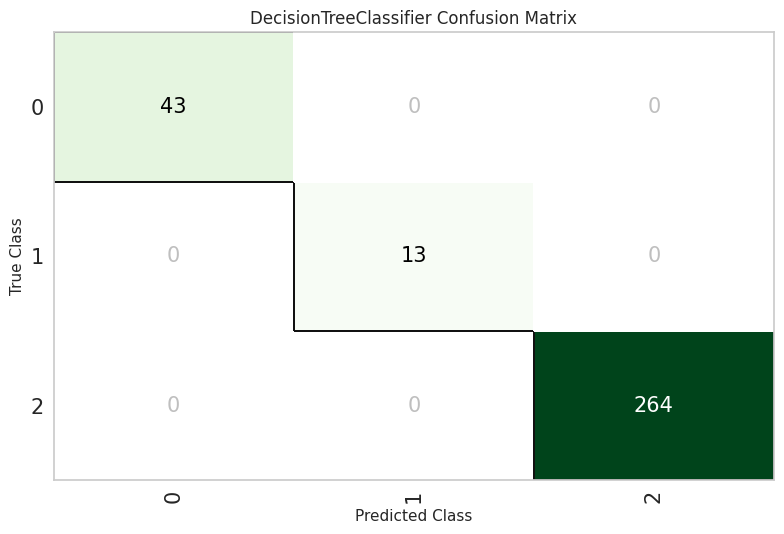

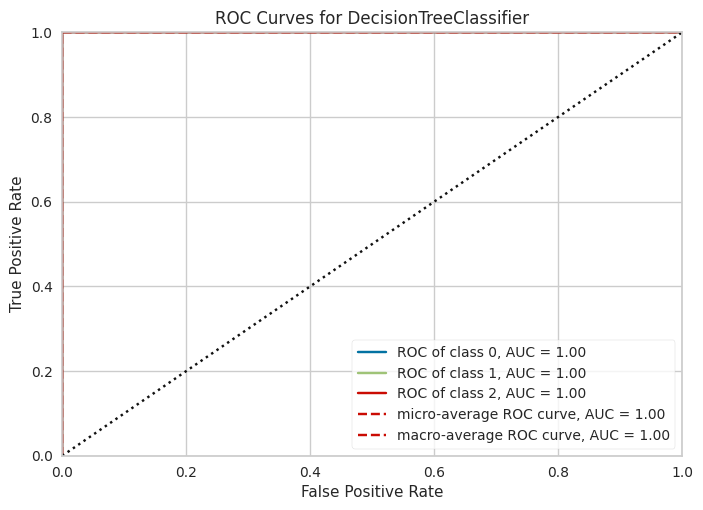

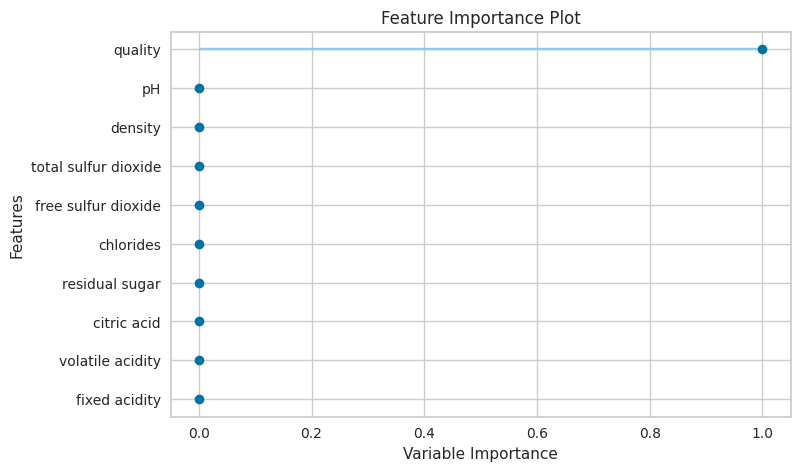

In [13]:
# Plot key metrics
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
plot_model(best_model, plot='feature')

In [14]:
# Predict on the test data
predictions = predict_model(best_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,prediction_label,prediction_score
956,9.0,0.36,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6,medium,medium,1.0
1483,8.1,0.33,0.44,1.5,0.042,6.0,12.0,0.99542,3.35,0.61,10.7,5,medium,medium,1.0
1122,6.3,0.47,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,6,medium,medium,1.0
648,8.7,0.48,0.30,2.8,0.066,10.0,28.0,0.99640,3.33,0.67,11.2,7,high,high,1.0
854,9.3,0.36,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6,medium,medium,1.0


In [15]:
final_model = finalize_model(best_model)
save_model(final_model, 'red_wine_quality_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                           